In [7]:
import pandas as pd
import networkx as nx

In [8]:
df = pd.read_csv('./data_scopus.csv');

In [9]:
df

,Title,Year,EID,Abstract,Publisher,Conference name,Conference date,Authors,Author(s) ID,Authors with affiliations,Source title,Abbreviated Source Title,Cited by
0,Virtual reality applications for the built env...,2020,2-s2.0-85086464158,With its advanced capabilities of immersive an...,Elsevier B.V.,NaN,NaN,"Zhang Y., Liu H., Kang S.-C., Al-Hussein M.",57202536919;53984550800;57215426514;6603541102;,"Zhang, Y., Department of Civil and Environment...",Automation in Construction,Autom Constr,NaN
1,"Self-tracking while doing sport: Comfort, moti...",2020,2-s2.0-85082875828,The spread of wearable technologies is paving ...,Academic Press,NaN,NaN,"Rapp A., Tirabeni L.",23398572100;57191836654;,"Rapp, A., Computer Science Department, Univers...",International Journal of Human Computer Studies,Int J Hum Comput Stud,NaN
2,"Bridge damage: Detection, IFC-based semantic e...",2020,2-s2.0-85078194587,Building Information Modeling (BIM) representa...,Elsevier B.V.,NaN,NaN,"Isailović D., Stojanovic V., Trapp M., Richter...",57205293410;56421700900;24831175200;3619515940...,"Isailović, D., Department for Construction Pro...",Automation in Construction,Autom Constr,NaN
3,VR system for spatio-temporal visualization of...,2019,2-s2.0-85075706132,Social media analysis is helpful to understand...,Springer,NaN,NaN,"Okada K., Yoshida M., Itoh T., Czauderna T., S...",57201502480;57171240600;35373203100;2592569550...,"Okada, K., Ochanomizu University, Tokyo, Japan...",Multimedia Tools and Applications,Multimedia Tools Appl,NaN
4,DiseaSE: A biomedical text analytics system fo...,2019,2-s2.0-85074886243,Due to increasing volume and unstructured natu...,Academic Press Inc.,NaN,NaN,"Abulaish M., Parwez M.A., Jahiruddin",6505934038;57202719622;35590173900;,"Abulaish, M., Department of Computer Science, ...",Journal of Biomedical Informatics,J. Biomed. Informatics,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,Propositional n-traces: visualizing a problem ...,1995,2-s2.0-0029533881,"As part of an inter-disciplinary effort, we ar...","IEEE, Los Alamitos, CA, United States",Proceedings of the 1995 6th Annual IEEE Confer...,29 October 1995 through 3 October 1995,"Prevost Nathalie, Jorgenson Loki, Jennings R.E...",6603428086;55937115800;16412349600;7003348138;,"Prevost, Nathalie, Simon Fraser Univ, Burnaby,...",Proceedings of the IEEE Visualization Conference,Proc IEEE Visual Conf,NaN
566,Fast algorithms for visualizing fluid motion i...,1995,2-s2.0-0029487213,The plotting of streamlines is an effective wa...,"IEEE, Los Alamitos, CA, United States",Proceedings of the 1995 6th Annual IEEE Confer...,29 October 1995 through 3 October 1995,"Ueng S.K., Sikorski K., Ma Kwan-Liu",7006871353;35194562700;35242602500;,"Ueng, S.K., Univ of Utah, Salt Lake City, Unit...",Proceedings of the IEEE Visualization Conference,Proc IEEE Visual Conf,10.0
567,Fast normal estimation using surface character...,1995,2-s2.0-0029488955,To visualize the volume data acquired from com...,"IEEE, Los Alamitos, CA, United States",Proceedings of the 1995 6th Annual IEEE Confer...,29 October 1995 through 3 October 1995,"Shin Byeong Seok, Shin Yeong Gil",7103027750;7402816561;,"Shin, Byeong Seok, Seoul Natl Univ, Seoul, Sou...",Proceedings of the IEEE Visualization Conference,Proc IEEE Visual Conf,4.0
568,Supporting heterogeneous data import for data ...,1995,2-s2.0-0029193549,Effective data visualization requires the comb...,"ACM, New York, NY, United States",Proceedings of the 1995 ACM Symposium on Appli...,26 February 1995 through 28 February 1995,"Ford R., Thompson R., Thompson D.",57214569671;8713633000;7404935132;,"Ford, R., Univ of Montana, Missoula, United St...",Proceedings of the ACM Symposium on Applied Co...,Proc ACM Symp Appl Computing,NaN


In [10]:
node = df['EID'].values
df = df.fillna(0)

In [11]:
h = df['Publisher'].values

In [12]:
list(set(h))

[0,
 'ACM, New York, NY, United States',
 'Springer Verlag',
 'Institute of Physics Publishing',
 'BioMed Central Ltd.',
 'Elsevier Science B.V., Amsterdam, Netherlands',
 'IEEE Comp Soc, Los Alamitos, CA, United States',
 'Elsevier',
 'Institute of Electrical and Electronics Engineers Inc.',
 'Springer New York LLC',
 'Association for Computing Machinery',
 'Academic Press Ltd, London',
 'Elsevier B.V.',
 'Academic Press',
 'Taylor and Francis Inc.',
 'Springer',
 'International Multidisciplinary Scientific Geoconference',
 'Elsevier Ltd',
 'IADIS',
 'Academic Press Inc.',
 'IEEE, Los Alamitos, CA, United States',
 'IEEE, Piscataway, NJ, United States',
 'IEEE Computer Society',
 'IEEE, United States',
 'Kluwer Academic Publishers',
 'Society for Imaging Science and Technology']

In [13]:
G = nx.Graph()

In [14]:
nodes = []
for row in df.iterrows():
  nodes.append((row[1]['EID'], {
      'Title': row[1]['Title'],
      'Year': row[1]['Year'],
      'Citations': row[1]['Cited by'],
      'Publisher': row[1]['Publisher'],
      'Country': len(row[1]['Publisher']) > 0 & row[1]['Publisher'].split(',')[2]
  }))

IndexError: list index out of range

In [15]:
nodes

[]

In [16]:
G.add_nodes_from(nodes)

In [17]:
df['Author(s) ID']

,Author(s) ID
0,57202536919;53984550800;57215426514;6603541102;
1,23398572100;57191836654;
2,57205293410;56421700900;24831175200;3619515940...
3,57201502480;57171240600;35373203100;2592569550...
4,6505934038;57202719622;35590173900;
...,...
565,6603428086;55937115800;16412349600;7003348138;
566,7006871353;35194562700;35242602500;
567,7103027750;7402816561;
568,57214569671;8713633000;7404935132;


In [18]:
edges = []
for row in df.iterrows():
  current_paper = row[1]['EID']
  if ';' in row[1]['Author(s) ID']:
    authors = row[1]['Author(s) ID'][:-1].split(';')
    for author in authors:
      papers = df[df['Author(s) ID'].str.contains(author)]['EID'].values
      if len(papers) > 0:
        for paper in papers:
          if paper != current_paper:
            edges.append((current_paper, paper))
  else:
    continue

In [19]:
edges

[('2-s2.0-85086464158', '2-s2.0-85060755230'),
 ('2-s2.0-85086464158', '2-s2.0-85060755230'),
 ('2-s2.0-85082875828', '2-s2.0-84971592065'),
 ('2-s2.0-85078194587', '2-s2.0-72949105789'),
 ('2-s2.0-85075706132', '2-s2.0-84863589228'),
 ('2-s2.0-85074886243', '2-s2.0-78649323301'),
 ('2-s2.0-85074886243', '2-s2.0-78649323301'),
 ('2-s2.0-85071686342', '2-s2.0-84897450439'),
 ('2-s2.0-85077803554', '2-s2.0-85063381572'),
 ('2-s2.0-85077803554', '2-s2.0-85063381572'),
 ('2-s2.0-85077803554', '2-s2.0-85058126143'),
 ('2-s2.0-85077803554', '2-s2.0-85063381572'),
 ('2-s2.0-85077803554', '2-s2.0-85058126143'),
 ('2-s2.0-85077803554', '2-s2.0-85058126143'),
 ('2-s2.0-85077803554', '2-s2.0-85063381572'),
 ('2-s2.0-85077803554', '2-s2.0-85058126143'),
 ('2-s2.0-85070952871', '2-s2.0-85063859157'),
 ('2-s2.0-85070952871', '2-s2.0-85063859157'),
 ('2-s2.0-85071875225', '2-s2.0-85073324217'),
 ('2-s2.0-85066064473', '2-s2.0-77955088235'),
 ('2-s2.0-85063859157', '2-s2.0-85070952871'),
 ('2-s2.0-850

In [20]:
G.add_edges_from(edges)

In [21]:
G.number_of_nodes()

331

In [22]:
G.number_of_edges()

387

In [23]:
pos = nx.drawing.circular_layout(G)

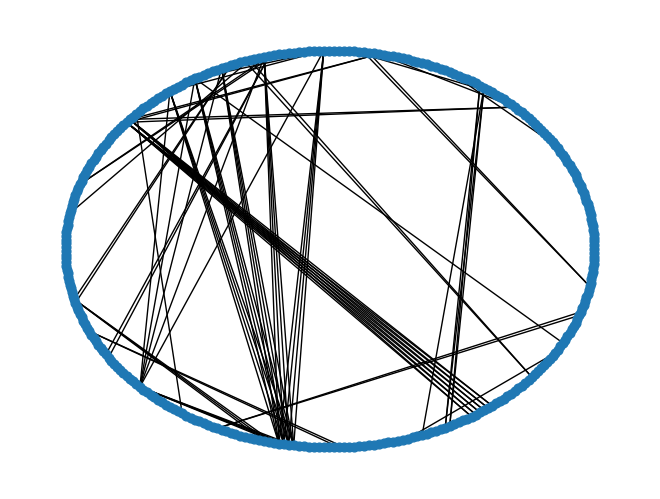

In [24]:
nx.draw(G,pos=pos, node_size=40)

In [25]:
from networkx.readwrite import json_graph
import json

In [26]:
with open('publication_network.json', 'w') as f:
  json.dump(json_graph.node_link_data(G), f)

/usr/local/lib/python3.10/dist-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(
